


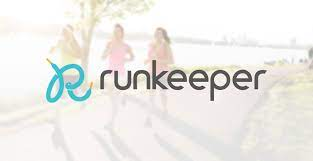

# Analyze your Runkeeper Fitness Data.

#### By : Yoshva Dani Juvenal .S

#### Email : yoshuvajuvenal52@gmail.com

#### Linkedin: https://www.linkedin.com/in/yoshva-dani-juvenal-155874273

# Introduction:

# Project Description:

With the explosion in fitness tracker popularity, runners all of the world are collecting data with gadgets (smartphones, watches, etc.) to keep themselves motivated. They look for answers to questions like:

How fast, long, and intense was my run today?
Have I succeeded with my training goals?
Am I progressing?
What were my best achievements?
How do I perform compared to others?
I exported seven years worth of training data from Runkeeper. The data is a CSV file where each row is a single training activity. In this project, you'll create import, clean, and analyze the data to answer the above questions.

## Obtain and Review Raw Data:

In [1]:
# Import pandas
import pandas as pd
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Define file containing dataset
runkeeper_file = "D:\Technocolabs Mini Project\Final Project\cardioActivities (2).csv"

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col="Date")

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2015-12-21 18:31:25,620a65d8-185f-40f4-8967-9ce068f02269,Running,NaN,10.02,57:55,5:47,10.38,687.0,91,138.0,NaN,TomTom MySports Watch,2015-12-21-183125.gpx
2017-06-17 10:13:45,d4fccef8-c615-43a8-bf27-fa75bb200d13,Running,NaN,14.87,1:25:46,5:46,10.41,1048.0,247,143.0,NaN,TomTom MySports Watch,2017-06-17-101345.gpx
2018-10-19 17:52:32,fe2cb3fc-6330-40fa-8a92-0f86f4e72282,Running,NaN,10.29,59:18,5:46,10.41,764.0,133,155.0,NaN,NaN,2018-10-19-175232.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

In [2]:
df_activities.head(10)

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
2018-10-19 17:52:32,fe2cb3fc-6330-40fa-8a92-0f86f4e72282,Running,NaN,10.29,59:18,5:46,10.41,764.0,133,155.0,NaN,NaN,2018-10-19-175232.gpx
2018-10-14 17:28:56,96acedc9-d3d5-4aac-8df4-f549a6418c1d,Running,NaN,12.93,1:10:16,5:26,11.04,953.0,159,158.0,NaN,NaN,2018-10-14-172856.gpx
2018-10-12 17:41:58,3c91092b-e6f3-4565-b540-6b6537358006,Running,NaN,12.31,1:09:26,5:38,10.64,903.0,134,157.0,NaN,NaN,2018-10-12-174158.gpx
2018-10-06 16:45:02,4c163abe-3a57-42fd-b50b-7f365960cbd4,Cycling,NaN,19.63,1:26:26,4:24,13.63,577.0,210,79.0,NaN,NaN,2018-10-06-164502.gpx


# 1) Data Preprocessing:

In [3]:
df_activities.isnull().sum()

Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

In [4]:
df_activities.describe()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged
count,508.000000,508.000000,5.080000e+02,508.00000,294.000000,0.0
mean,11.757835,11.341654,1.878197e+04,128.00000,143.530612,NaN
std,6.209219,2.510516,2.186930e+05,108.52604,10.583848,NaN
min,0.760000,1.040000,4.000000e+01,0.00000,77.000000,NaN
25%,7.015000,10.470000,4.917500e+02,53.00000,140.000000,NaN
50%,11.460000,11.030000,7.280884e+02,92.00000,144.000000,NaN
75%,13.642500,11.642500,9.212500e+02,172.25000,149.000000,NaN
max,49.180000,24.330000,4.072685e+06,982.00000,172.000000,NaN


Dropping off the unwanted columns for analysis like:

1) Dropping off the "Route Name" column as only once the Route name has been mentioned in the entire data.
2) Dropping off the "Friend's Tagged" column as it has been never used.
3) Dropping off the "Notes" column as it is considered as an optional column and most of the time it has been left blank.
4) Dropping off the unnecessary columns like "GPX File","Activity ID" and "Calories Burned".


In [8]:
drop_columns = ['Route Name','Friend\'s Tagged','Notes','GPX File','Activity Id','Calories Burned' ]
df_activities.drop(columns = drop_columns, inplace=True)

In [9]:
print(df_activities.columns)

Index(['Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')


Replacing the "Other" activity type to "Unicycling" because that was always the "Other" activity. 

In [10]:
df_activities['Type'] = df_activities['Type'].str.replace('Other','Unicycling')

In [11]:
df_activities.head(20)

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0
2018-10-19 17:52:32,Running,10.29,59:18,5:46,10.41,133,155.0
2018-10-14 17:28:56,Running,12.93,1:10:16,5:26,11.04,159,158.0
2018-10-12 17:41:58,Running,12.31,1:09:26,5:38,10.64,134,157.0
2018-10-06 16:45:02,Cycling,19.63,1:26:26,4:24,13.63,210,79.0


In [12]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      508 non-null    object 
 1   Distance (km)             508 non-null    float64
 2   Duration                  508 non-null    object 
 3   Average Pace              508 non-null    object 
 4   Average Speed (km/h)      508 non-null    float64
 5   Climb (m)                 508 non-null    int64  
 6   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [13]:
df_activities.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

In [14]:
df_activities.describe()

,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
count,508.000000,508.000000,508.00000,294.000000
mean,11.757835,11.341654,128.00000,143.530612
std,6.209219,2.510516,108.52604,10.583848
min,0.760000,1.040000,0.00000,77.000000
25%,7.015000,10.470000,53.00000,140.000000
50%,11.460000,11.030000,92.00000,144.000000
75%,13.642500,11.642500,172.25000,149.000000
max,49.180000,24.330000,982.00000,172.000000


As we could find there are "214" missing values in the "Average Heart Rate" column. We can fill the missing values using "Mean Imputation" method. But while filling up the null values with the mean values we have to consider that the dataframe has different types of activities and the average heart rate also varies according to the type of activity.  

# 2) Dealing with the Missing Values:

### Calculating sample mean for Average Heart Rate (bpm) for each activity type:

In [15]:
avg_hr_running = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycling = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
print(avg_hr_running,'&', avg_hr_cycling)

144.985559566787 & 124.4


In [16]:
#Split the dataframe into several, specific for different activities:
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

In [17]:
#Filling the missing values with the counted means:
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_running), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycling), inplace=True)

In [18]:
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [19]:
df_walk.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [20]:
df_cycle.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

# 3) Plot Running Data:

As we found, most of the activities in the data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively.

A first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, Date, is shared among all subplots.

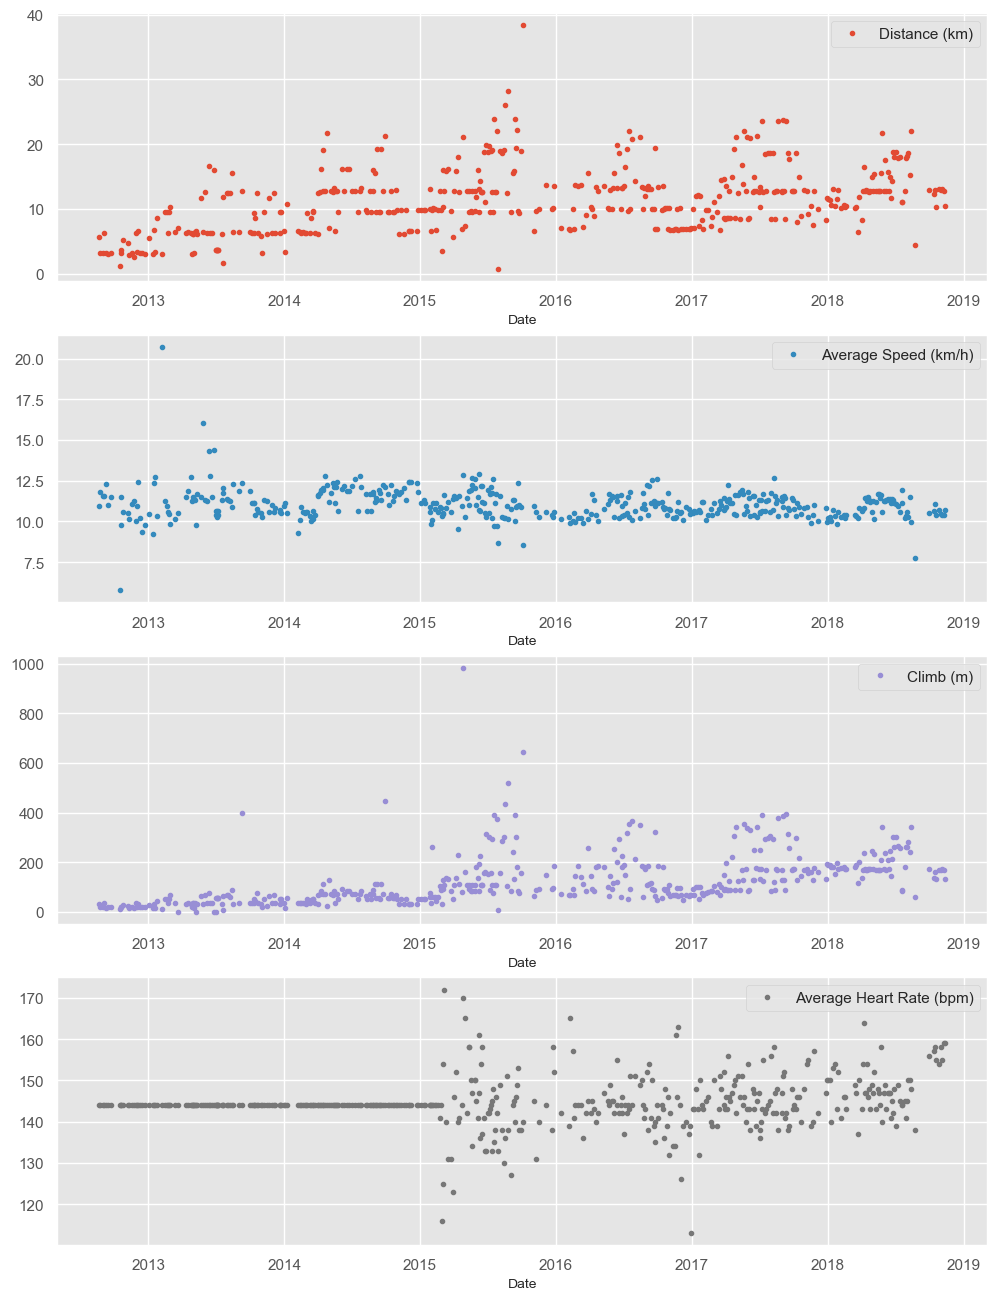

In [25]:
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Prepare data subsetting period from 2012 till 2018:
runs_subset_2012_2018 = df_run['2012':'2018']

# Create, plot and customize:
runs_subset_2012_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

plt.show()

By looking the above plots we could find that before 2015 we don't have any record for the Average Heart Rate(bpm) and we filled those missing data using Mean Imputation method. By analysing the plot we could see that the Average Heart Rate remains constant before 2015 and after 2015 the Heart Rate Scatters. So to get Average lets use data from 2015 to 2018.

By using the resample() method in pandas we could be able to group a specific Time Span. To get average running stats we resample our data into Annual and weekly Stats.

# 4) Running Statistics:

In [26]:
#Prepare Running data for last 4 years:
runs_subset_2015_2018 = df_run['2015':'2018']

#Calculate Annual Statistics:
print('How my Average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())

#Calculate Weekly Statistics:
print('Weekly average run of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean().mean())

#Mean Weekly Counts:
weekly_counts_avg = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_avg)

How my Average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly average run of last 4 years:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

How many trainings per week I had on average: 1.5


Overall, the output suggests that the person is a regular runner who maintains a moderate pace and distance. The weekly climb and heart rate suggest that the person also incorporates hills and interval workouts into his training.

# 5) Visualizations using the Averages:

Lets plot the long term averages of his distance run and his Heart Rate with the Raw Data to visually compare the averages of each training sessions. For that again we'll use the  data from 2015 to 2018. 

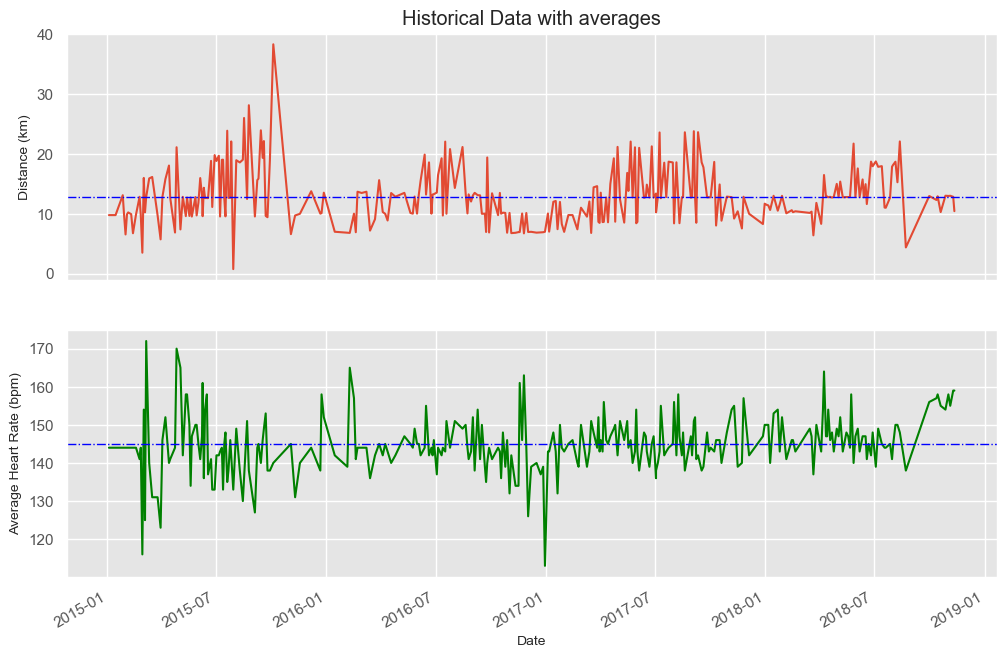

In [27]:
#Prepare Data to Assignment:
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

#Plotting:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,8))

#Plot and Customize first subplot:
runs_distance.plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Distance (km)', title='Historical Data with averages')
ax1.axhline(runs_distance.mean(), color = 'blue', linewidth=1, linestyle='-.')

#Plot and Customize second subplot:
runs_hr.plot(ax=ax2, color='green')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color = 'blue', linewidth=1, linestyle='-.')

#Show Plot:
plt.show()

From the above Visualizations we could say that the Average Distance falls around 12.5(km) and Average Heart Rate (bpm) falls around 145(bpm). 

# Did he reach his goals?


To motivate himself to run regularly, he sets a target goal of running 1000 km per year. So, lets visualize the annual running distance(km) from 2013 to 2018 to see whether he reached his goal every year. Stars that falls in the Green Region indicates Success.

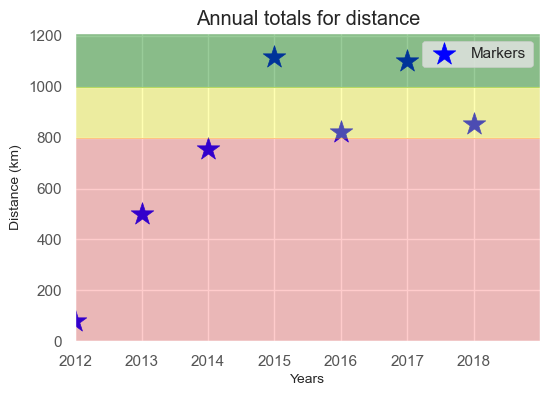

In [28]:
import matplotlib.pyplot as plt

# Prepare data
df_run_dist_annual = df_run.query("(Date <= 2019) and (Date >= 2012)")["Distance (km)"].resample("A").sum()

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot and customize
x_values = range(2012, 2019)
y_values = df_run_dist_annual.values

# Plot markers
ax.scatter(x_values, y_values, marker='*', s=290, color='blue', label='Markers')


# Define the x-axis and y-axis limits, labels, and title
ax.set(ylim=[0, 1210], xlim=[2012, 2019], ylabel='Distance (km)', xlabel='Years', title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

# Set the x-axis ticks and labels
ax.set_xticks(x_values)
ax.set_xticklabels([str(year) for year in x_values])

# Show plot
plt.legend()
plt.show()

From the above plot we could find that in the year 2013 he just ran a total of 500 (km), where he just reached halfway through his goal.

In the year 2014, he showed some progress in his run and ran around 780 (km), but still he couldn't reach his goal.

In the year 2015, he outperformed his goal and ran around 1100 (km) and succeeded his goal of running 1000 (km) every year for the first time.

In the year 2016, we could find a setback in his run where he ran just 810 (km). 

And in the year 2017 again he proved he could be consistent and ran around 1080 (km) and accomplished his goal.

At last in the year 2018 he was so close to reach his goal and ran around 860 (km) but still unable to reach his goal.

# Is he Progressing?

Let's analyze a little deeper into our data and find whether he is progressing in terms of his running skills?

To do that analysis we'll decompose his weekly distance run and visually compare it to the Raw Data. The Red trend line will represent the weekly distance run.

We are going to use Statsmodels library to decompose the weekly trend.

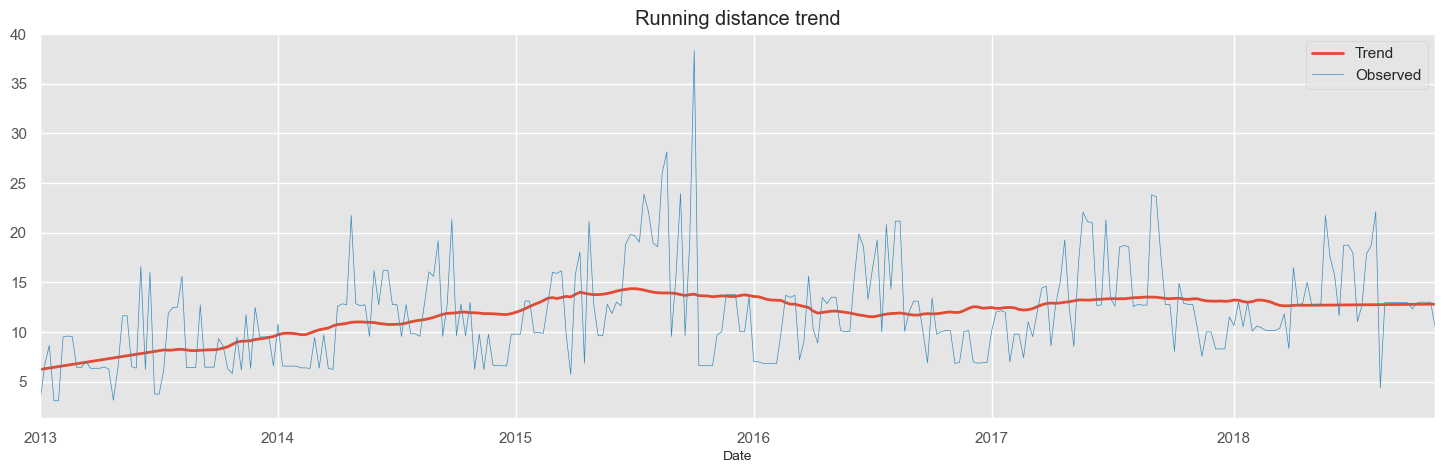

In [29]:
# Import required library
import statsmodels.api as sm

# Prepare data
df_run_dist_wkly = df_run.query("(Date <= 2019) and (Date >= 2013)")["Distance (km)"].resample("W").bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1)

# Create plot
fig = plt.figure(figsize=(18, 5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

From the above plot we could find that, the overall trend in running distance is positive, indicating that the runner is improving over time.

There is a seasonal pattern in the data, with higher running distances in the spring and summer months. This could be due to a number of factors, such as better weather conditions, more daylight hours, and increased motivation to run outdoors.

There are a few weeks where the runner's running distance is significantly lower than the overall trend. This could be due to a variety of factors, such as illness, injury, or vacation.

Overall, the output suggests that the runner is on a positive trajectory. The runner is consistently running longer distances over time, and the seasonal pattern in the data is relatively consistent.

# Training Intensity:

Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.

We'll create a distribution plot of his heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones.

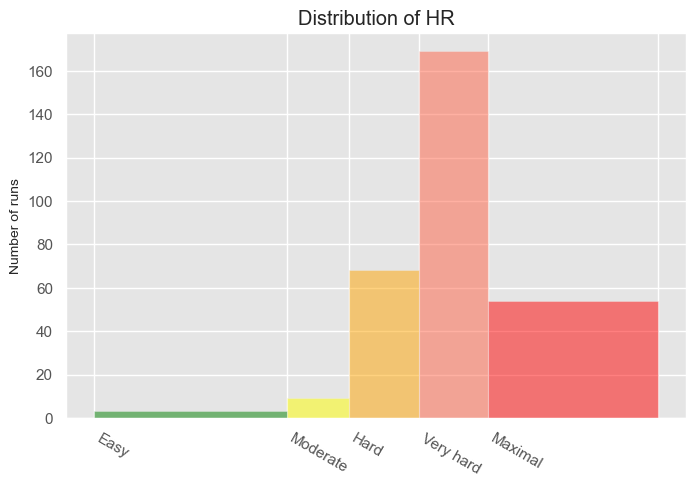

In [30]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal', ""]
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run.query("(Date <= 2019) and (Date >= 2015)")["Average Heart Rate (bpm)"]

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

# Show plot
plt.show()

#### Interpretation of the output:

The majority of runs were completed in the Hard and Very hard heart rate zones. This suggests that the runner is generally training at a level that is appropriate for their fitness level.

However, the runner also has a significant number of runs in the Maximal heart rate zone. This suggests that the runner is also challenging themselves and pushing themselves to improve their fitness.

The runner has a slightly higher proportion of runs in the Very hard and Maximal heart rate zones in 2015 compared to previous years. This could be a sign that the runner is getting fitter and is able to handle more challenging workouts.

The runner also has a slightly lower proportion of runs in the Easy and Moderate heart rate zones in 2013 & 2014 compared to other years. This could be due to a number of factors, such as only on that period the runner may have started his fitness journey and he could be a beginner during those times.

Overall, the output plot suggests that the runner is following a well-rounded training plan. The runner is balancing easy and moderate runs with harder runs, which is important for improving fitness and performance. The runner is also showing signs of improvement over time, with a slightly higher proportion of runs in the Very hard and Maximal heart rate zones in 2015.

# Detailed Summary Report:

With all this data cleaning, analysis, and visualization, let's create detailed summary tables of his training.

To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.

In [31]:
# Concatenating three DataFrames
df_run_walk_cycle = pd.concat([df_run, df_cycle, df_walk]).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]
292
print('Summary statistics for different training types:')
df_summary.stack()

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

# Conclusion:

Based on the analysis of the Runkeeper fitness data, we could find that the runner seems to be a beginner for long distance running before 2015 so it is reasonable to conclude that the runner was unable to accomplish his fitness goals fully but still only because of those initial runs the person was able to accomplish his goal twice which is in the year 2015 & 2017.Those runs before 2015 helped him to achieve his goal.